In this notebook, we are going to focus on text generated by the following three prompts:

1. Does the electoral college work?
2. Community service
3. Grades for extracurricular activities

Our objectives are:
- Use t-SNE to visualize the distribution of the embeddings


In [2]:
# Data Handling and Processing
import pandas as pd
import numpy as np
import itertools

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text Analysis
import string
import re

# DAIGT v2 train dataset
df = pd.read_csv("/home/yang/.cache/kagglehub/datasets/thedrcat/daigt-v3-train-dataset/versions/2/train_v3_drcat_02.csv")
embedding_df = pd.read_pickle('embedding_all-MiniLM-L6-v2.pkl')
df = pd.concat([df, embedding_df], axis=1)
df['hard_to_classify'] = pd.read_pickle('hard_to_classify.pkl')

from last notebook, we see that it does not matter if the pca is fitted on human or all data. we'll try this again, but with pca ran on data representing each of the prompts. 

In [3]:
label_list = sorted(df['label'].unique())
model_list = sorted(df['model'].unique())
prompt_list = sorted(df['prompt_name'].unique())


Focus on the following column. 
use a realistic scenaio where we only have data on AI writing about 'Community service'. would  the pca and tsne method shed as much light on the 'ai'-ness of the other topics? 


In [4]:
topics_dict = {
    'elect': 'Does the electoral college work?', 
    'comm': 'Community service', 
    'grades': 'Grades for extracurricular activities', 
}


In [5]:
from sklearn.decomposition import PCA
import joblib
from sklearn.manifold import TSNE


def perform_pca_tsne(df, fit_data = None, pca_components=30, random_state=42, perplexity=30, suffix=''):
    # get fitting and embedding data. 
    embeddings = np.array(df['embedding'].to_list())
    if fit_data is None: 
        fit_data = embeddings
    # Fit PCA
    pca = PCA(n_components=pca_components, random_state=random_state)
    pca.fit(fit_data)
    # save pca model
    joblib.dump(pca, f'pca_{str(pca_components)}_r{random_state}'+ suffix + '.pkl')

    # Transform the entire dataframe
    reduced_embeddings = pca.transform(embeddings)
    
    # Add the reduced embeddings back to the dataframe
    reduced_col_name = f'reduced_embedding_{str(pca_components)}'+ suffix
    df[reduced_col_name] = list(reduced_embeddings)
    
    # Perform t-SNE
    tsne_col_names = ['tsne_p' + suffix + str(perplexity) + '_1', 'tsne_p' + suffix + str(perplexity) + '_2']
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
    tsne_results = tsne.fit_transform(reduced_embeddings)
    
    # Add the t-SNE results to the dataframe
    df[tsne_col_names[0]] = tsne_results[:, 0]
    df[tsne_col_names[1]] = tsne_results[:, 1]

    
    return df


In [6]:
import importlib
import utils.ploting_util
importlib.reload(utils.ploting_util)
from utils.ploting_util import plot_tsne

In [ ]:
topics = ['elect', 'comm', 'grades']
topicdf_dict = {}


In [13]:
# make special palette so that the human alpha is 1, else it's 0.5
palette = sns.color_palette("Set1") + sns.color_palette("Set2")
human_alpha = 1
ai_alpha = 0.7
hue_order = model_list
new_palette = [(r, g, b, human_alpha if model == 'human' else ai_alpha) for (r, g, b), model in zip(palette, hue_order)]

/tmp/ipykernel_607265/3128800263.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[reduced_col_name] = list(reduced_embeddings)
/tmp/ipykernel_607265/3128800263.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[tsne_col_names[0]] = tsne_results[:, 0]
/tmp/ipykernel_607265/3128800263.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

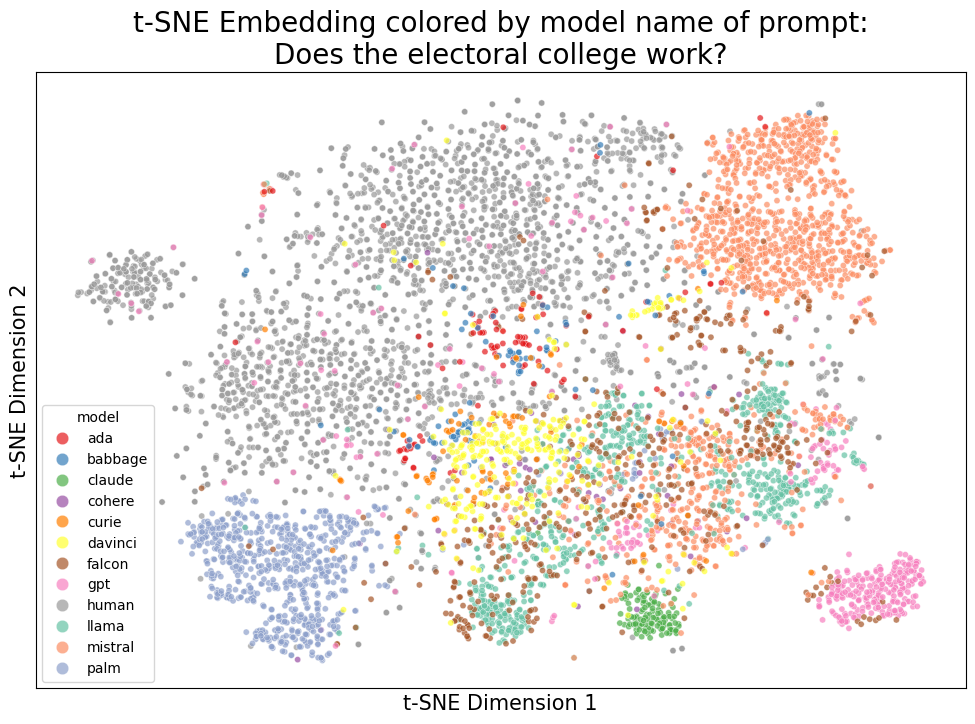

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


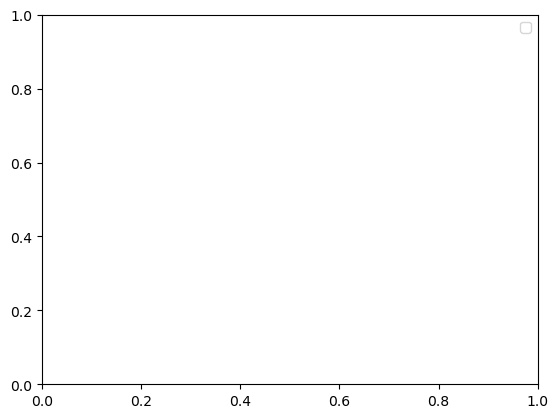

In [14]:
topic = 'elect'
topic_str = topics_dict[topic]
currdf = df[df['prompt_name'] == topic_str]
fit_data = np.array(currdf['embedding'].to_list())
currdf = perform_pca_tsne(currdf, 
    fit_data=fit_data,
    suffix=f'_{topic}',
)
topicdf_dict[topic] = currdf

plot_tsne(currdf, hue='model', s=20, markerscale=2, palette=new_palette,
          x_col=f'tsne_p_{topic}30_1', y_col=f'tsne_p_{topic}30_2', 
          title=f't-SNE Embedding colored by model name of prompt:\n{topic_str}', hue_order=model_list)
plt.legend()
plt.show()

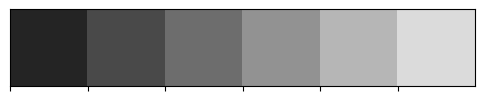

In [23]:
# Create a grayscale color palette with 10 shades
grayscale_palette = sns.color_palette("gray", 6)

# Example plot using the grayscale color palette
sns.palplot(grayscale_palette)  # Display the color palette
mygreypalette = sns.color_palette([grayscale_palette[1], grayscale_palette[-2]])

In [32]:
unique_labels = labels[:len(set(currdf['model']))]
cluster_legend = ax.legend(handles=unique_handles, labels=unique_labels, title="Clusters", loc="upper right", markerscale = 3)

unique_labels

['1']

In [33]:
currdf['model'].unique()

array(['human', 'claude', 'gpt', 'falcon', 'llama', 'mistral', 'palm',
       'cohere', 'ada', 'babbage', 'curie', 'davinci'], dtype=object)

In [39]:
handles, labels = ax.get_legend_handles_labels()
handles[0]

/tmp/ipykernel_607265/3128800263.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[reduced_col_name] = list(reduced_embeddings)
/tmp/ipykernel_607265/3128800263.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[tsne_col_names[0]] = tsne_results[:, 0]
/tmp/ipykernel_607265/3128800263.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

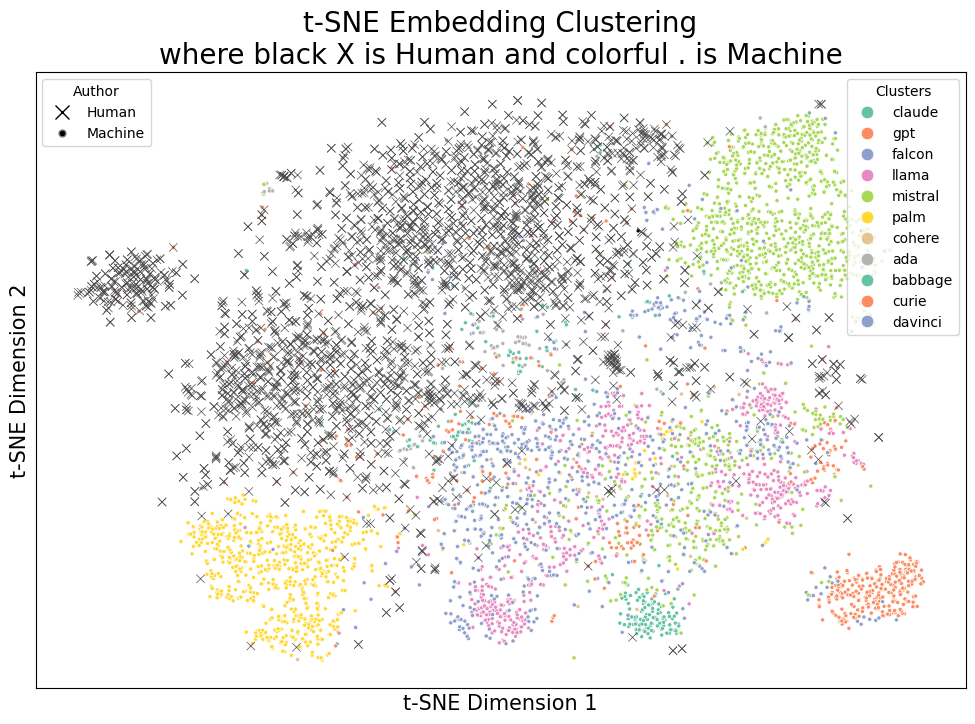

In [ ]:
import matplotlib.lines as mlines


# Create a new figure and single subplot
fig, ax = plt.subplots(figsize=(12, 8))

topic = 'elect'
topic_str = topics_dict[topic]
currdf = df[df['prompt_name'] == topic_str]
fit_data = np.array(currdf['embedding'].to_list())
currdf = perform_pca_tsne(currdf, 
    fit_data=fit_data,
    suffix=f'_{topic}',
)

curr_model_list = ['claude', 'gpt', 'falcon', 'llama', 'mistral', 'palm',
       'cohere', 'ada', 'babbage', 'curie', 'davinci']

# Plot each label with specific markers using the same axes
for i, (label, marker) in enumerate({1: '.', 0: 'x'}.items()):
    if label == 0: 
        palette = mygreypalette
        hue_order = None
    else: 
        palette = 'Set2'
        hue_order = curr_model_list
    
    sns.scatterplot(
        data=currdf[currdf['label'] == label],
        x='tsne_p_elect30_1',
        y='tsne_p_elect30_2',
        hue='model',
        marker=marker,
        palette=palette,
        alpha=1,
        #edgecolor='w',
        ax=ax, 
        hue_order = hue_order,
        legend=False if i ==1 else "auto"
    )

# Set plot title and labels on the single axis
ax.set_title('t-SNE Embedding Clustering\nwhere black X is Human and colorful . is Machine', fontsize=20)
ax.set_xlabel('t-SNE Dimension 1', fontsize=15)
ax.set_ylabel('t-SNE Dimension 2', fontsize=15)
ax.set_xticks([])
ax.set_yticks([])

# Add a single legend for clusters
handles, labels = ax.get_legend_handles_labels()
#cluster_legend = ax.legend(handles[:len(set(currdf['kmean_9']))], title="Clusters", loc="upper right")
# Add a single legend for clusters by extracting only the cluster handles and labels

#unique_handles = handles[:len(set(currdf['model']))]
unique_handles = handles[:len(curr_model_list)]
#unique_labels = model_list[:len(set(currdf['model']))]
unique_labels = hue_order
cluster_legend = ax.legend(handles=unique_handles, labels=unique_labels, \
                           title="Models", loc="upper right", markerscale = 3)


# Create custom legend entries for 'Machine' and 'Human' markers
human_marker = mlines.Line2D([], [], linestyle='None', color='black', marker='x', markerfacecolor='k', markersize=10, label='Human')
machine_marker = mlines.Line2D([], [], linestyle='None', color='grey', marker='.', markerfacecolor='k', markersize=10, label='Machine')

# Add the custom legend for markers
ax.add_artist(cluster_legend)  # Keep the existing cluster legend
ax.legend(handles=[human_marker, machine_marker], title="Author", loc="upper left", fontsize=15)

# Show the plot
plt.show()


In [ ]:
plt.savefig('img/your_image.png', facecolor='white')

/tmp/ipykernel_219145/3128800263.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[reduced_col_name] = list(reduced_embeddings)
/tmp/ipykernel_219145/3128800263.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[tsne_col_names[0]] = tsne_results[:, 0]
/tmp/ipykernel_219145/3128800263.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

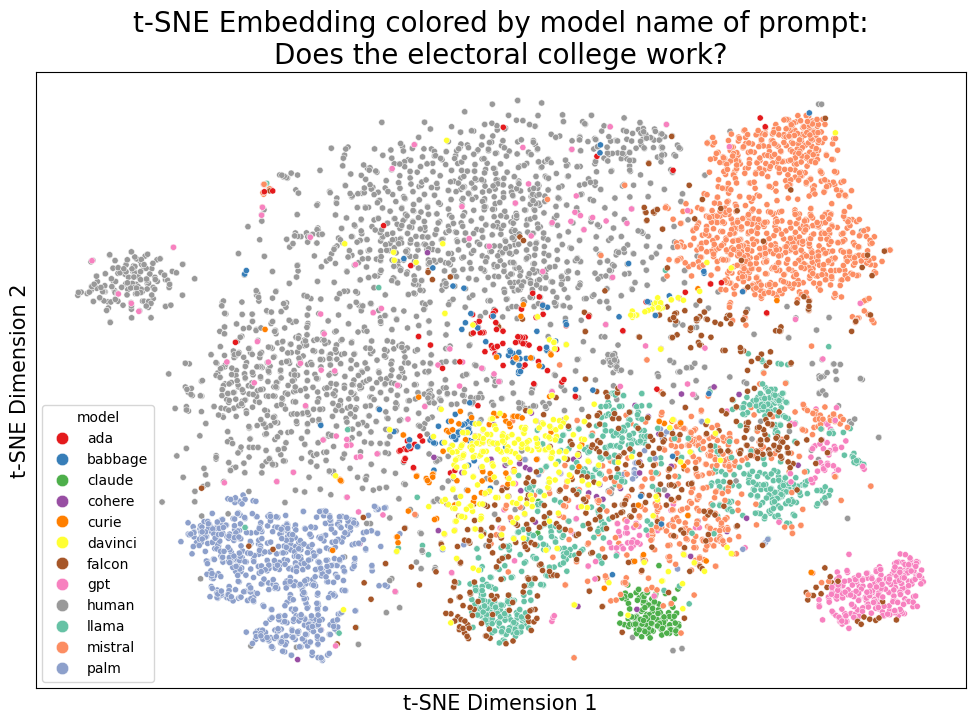

/tmp/ipykernel_219145/3128800263.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[reduced_col_name] = list(reduced_embeddings)
/tmp/ipykernel_219145/3128800263.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[tsne_col_names[0]] = tsne_results[:, 0]
/tmp/ipykernel_219145/3128800263.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

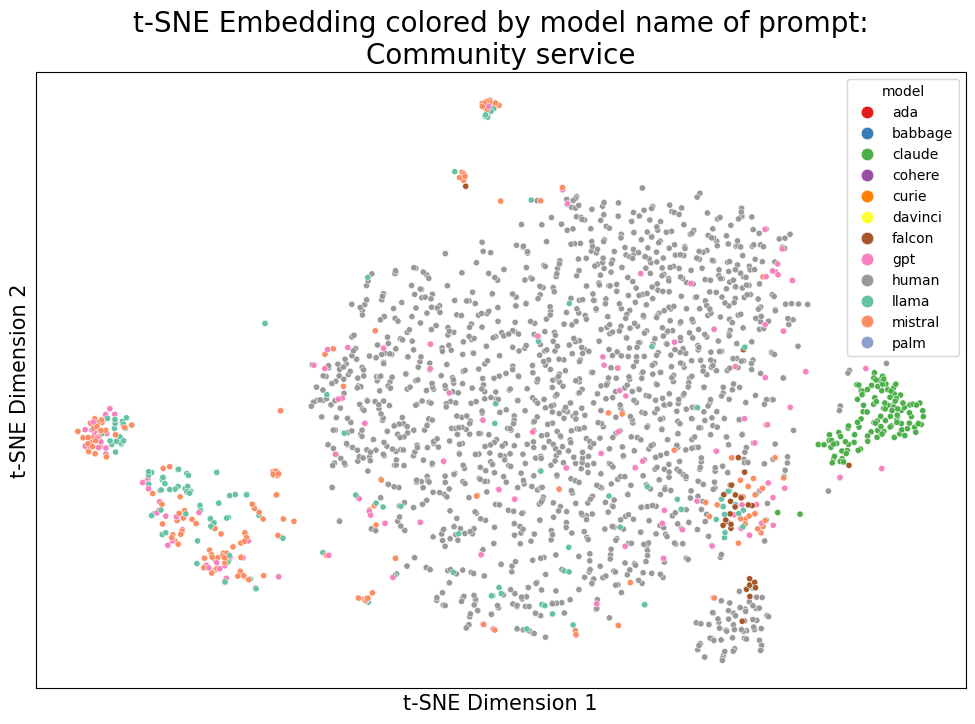

/tmp/ipykernel_219145/3128800263.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[reduced_col_name] = list(reduced_embeddings)
/tmp/ipykernel_219145/3128800263.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[tsne_col_names[0]] = tsne_results[:, 0]
/tmp/ipykernel_219145/3128800263.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

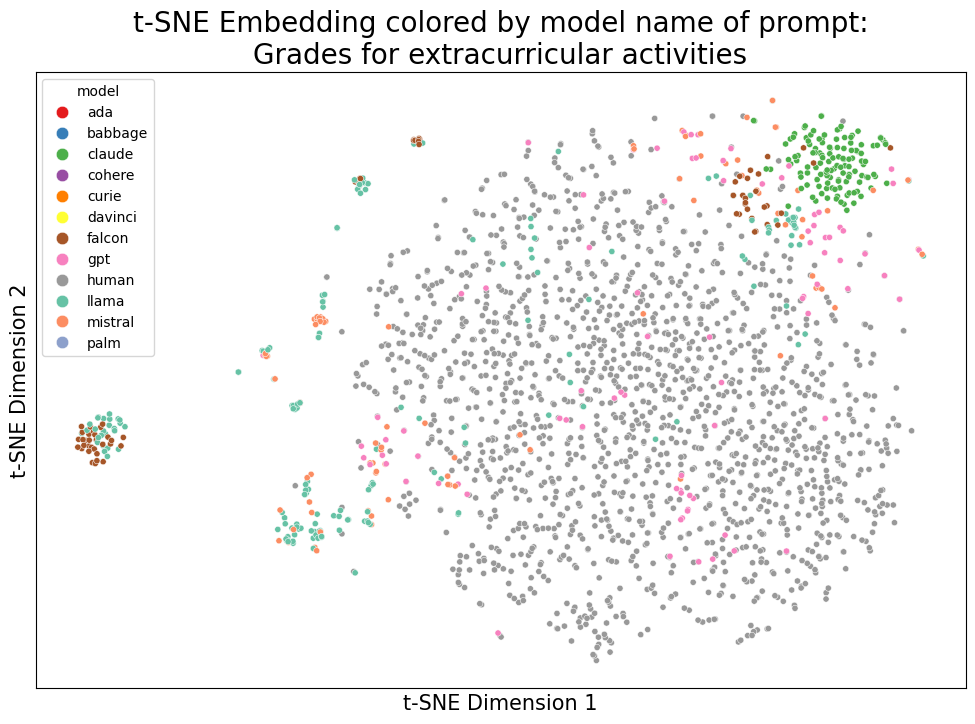

In [ ]:

for topic in topics:
    topic_str = topics_dict[topic]
    currdf = df[df['prompt_name'] == topic_str]
    fit_data = np.array(currdf['embedding'].to_list())
    currdf = perform_pca_tsne(currdf, 
        fit_data=fit_data,
        suffix=f'_{topic}',
    )
    topicdf_dict[topic] = currdf
    plot_tsne(currdf, hue='model', s=20, markerscale=2, alpha=1, 
              x_col=f'tsne_p_{topic}30_1', y_col=f'tsne_p_{topic}30_2', 
              title=f't-SNE Embedding colored by model name of prompt:\n{topic_str}', hue_order=model_list)

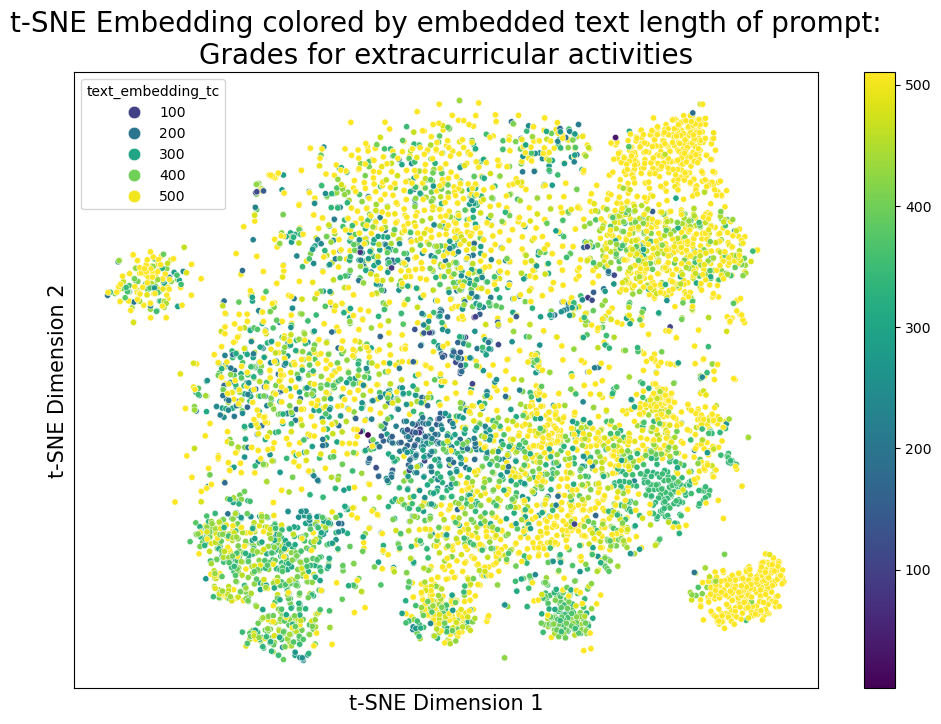

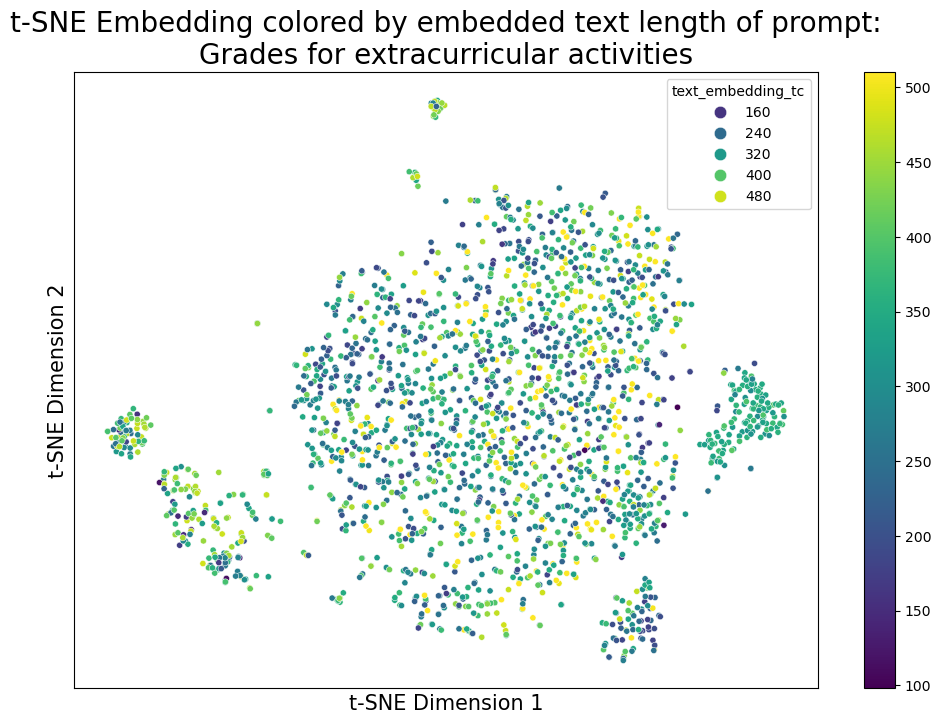

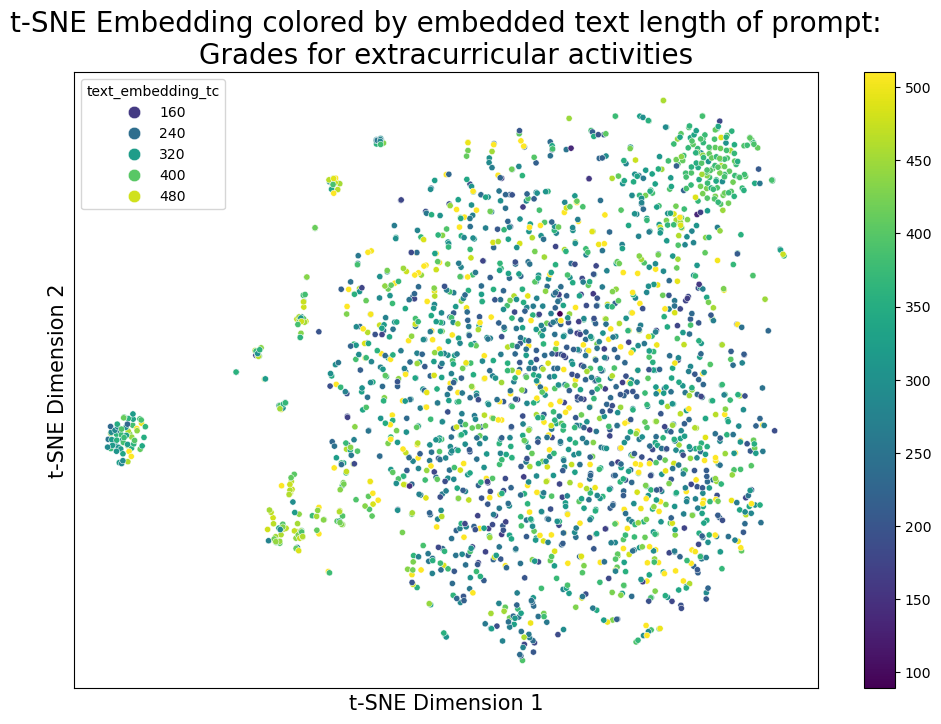

In [8]:
topics = ['elect', 'comm', 'grades']

for topic in topics:
    currdf = topicdf_dict[topic]
    plot_tsne(currdf, hue='text_embedding_tc', s=20, markerscale=2, alpha=1, palette='viridis',
              x_col=f'tsne_p_{topic}30_1', y_col=f'tsne_p_{topic}30_2', 
              title=f't-SNE Embedding colored by embedded text length of prompt:\n{topic_str}', hue_order=model_list)

/tmp/ipykernel_219145/801816750.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  currdf['wc'] = currdf['text'].apply(lambda x: len(x.split()))


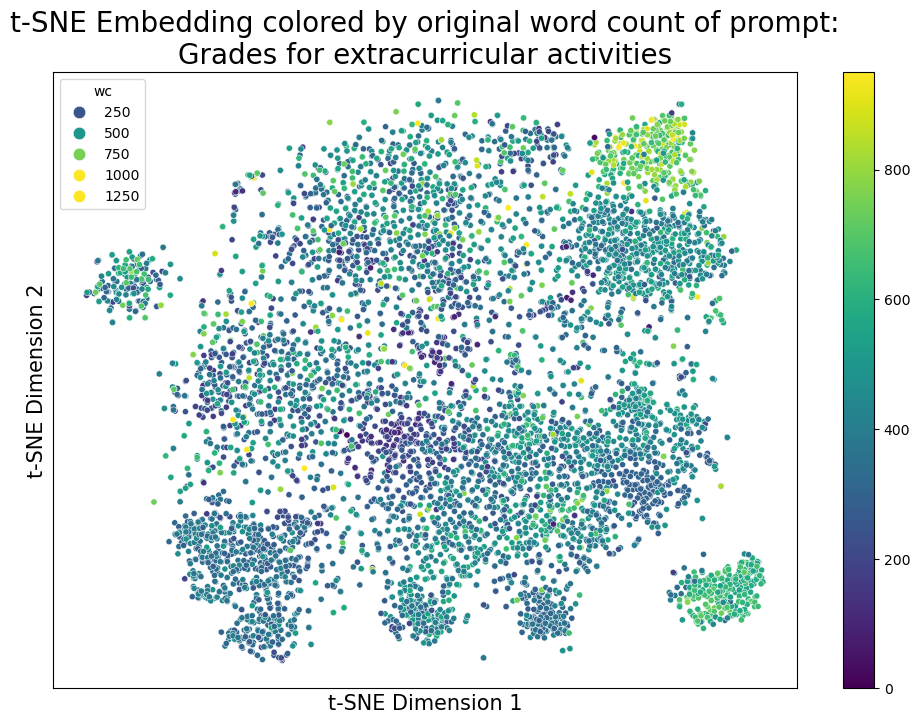

/tmp/ipykernel_219145/801816750.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  currdf['wc'] = currdf['text'].apply(lambda x: len(x.split()))


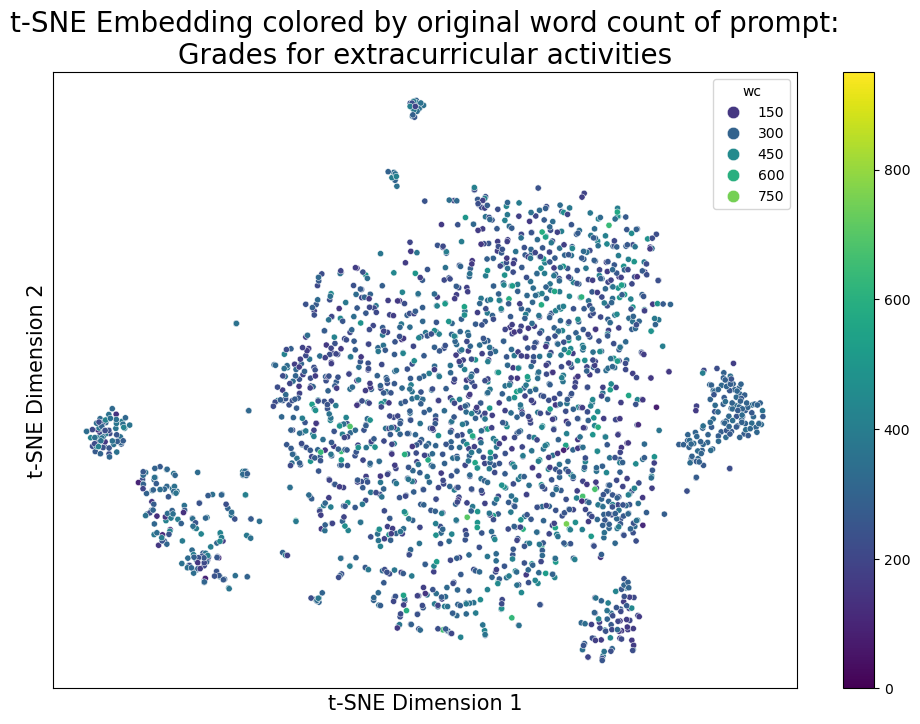

/tmp/ipykernel_219145/801816750.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  currdf['wc'] = currdf['text'].apply(lambda x: len(x.split()))


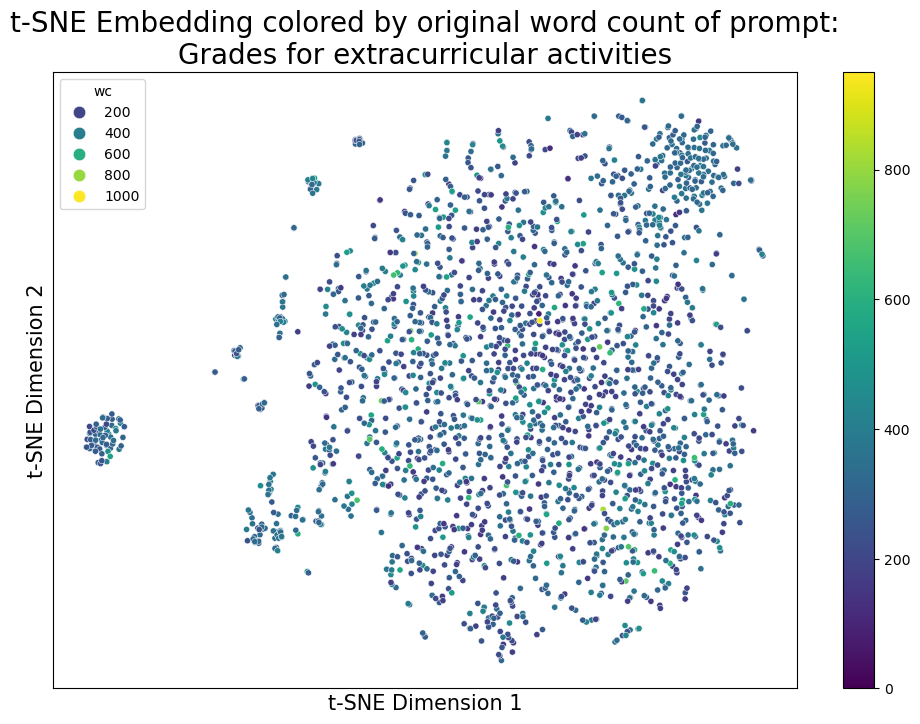

In [9]:
topics = ['elect', 'comm', 'grades']

for topic in topics:
    currdf = topicdf_dict[topic]
    currdf['wc'] = currdf['text'].apply(lambda x: len(x.split()))
    plot_tsne(currdf, hue='wc', s=20, markerscale=2, alpha=1, palette='viridis', hue_min = 0, hue_max=950,
              x_col=f'tsne_p_{topic}30_1', y_col=f'tsne_p_{topic}30_2', 
              title=f't-SNE Embedding colored by original word count of prompt:\n{topic_str}', hue_order=model_list)

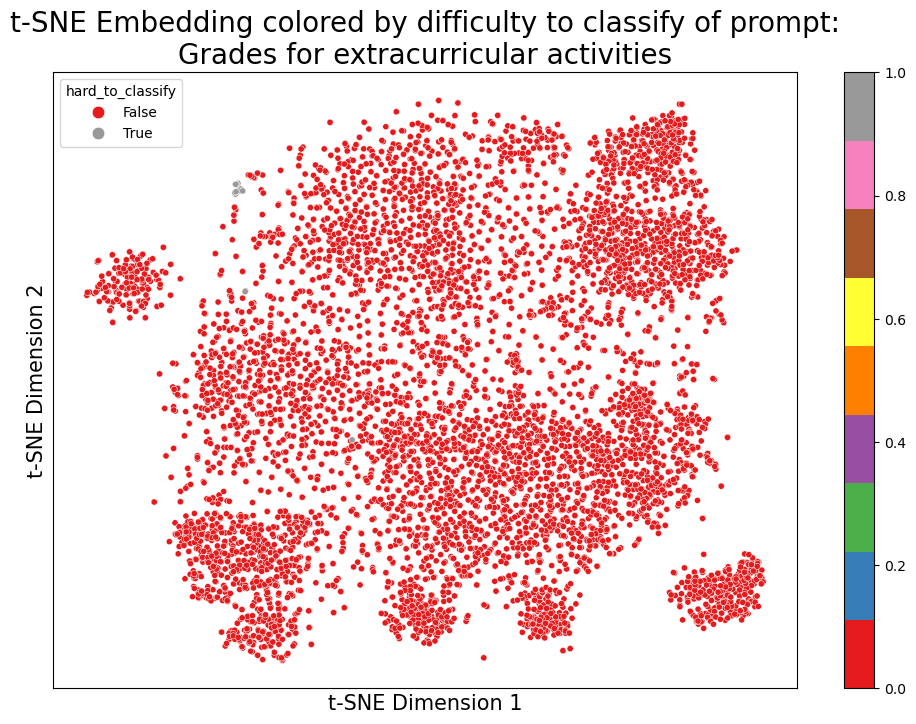

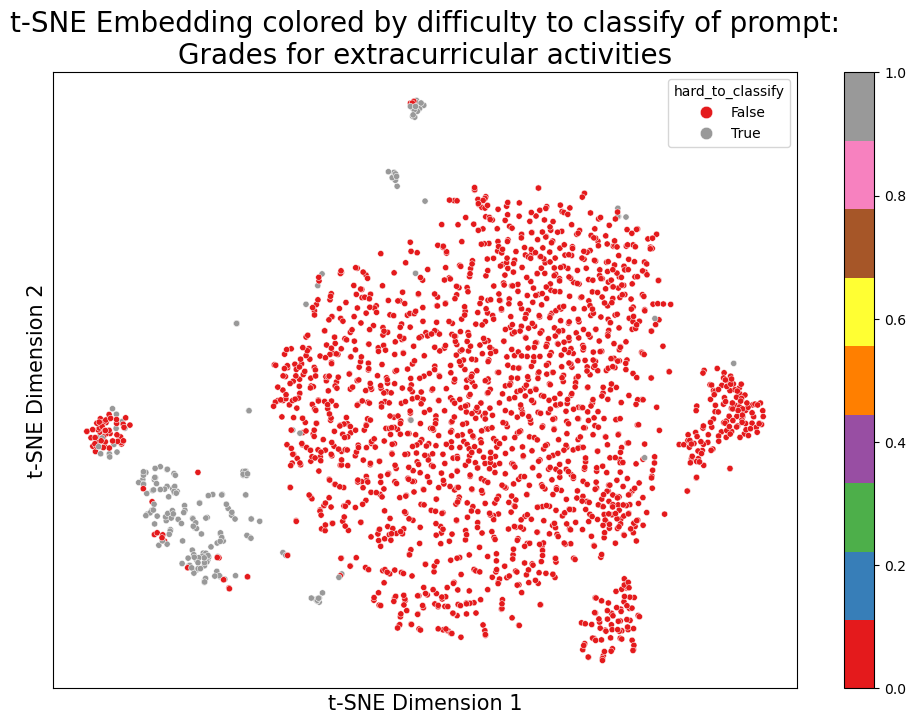

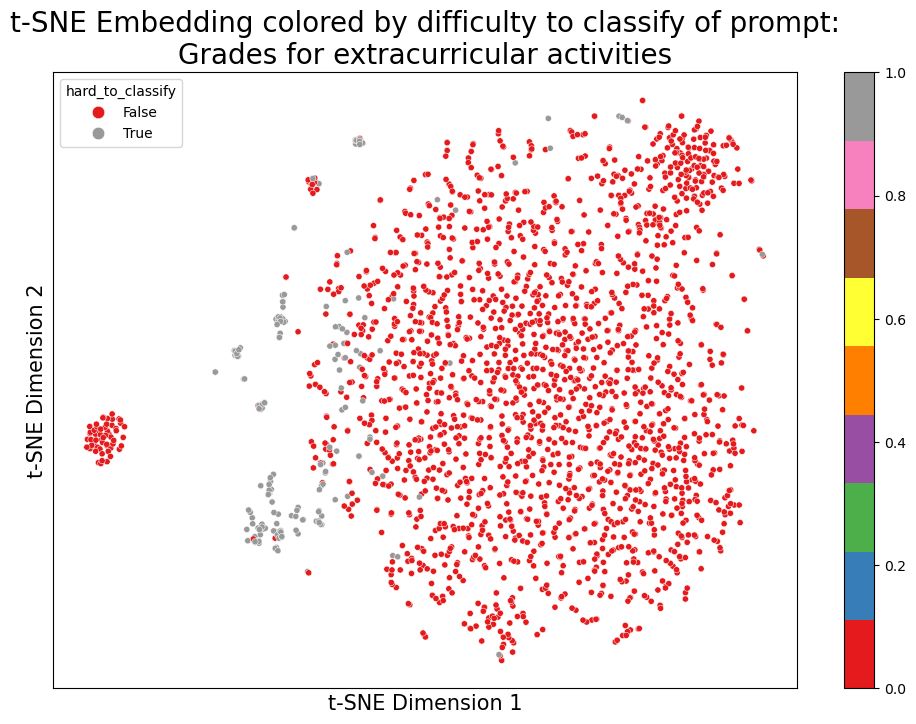

In [21]:
topics = ['elect', 'comm', 'grades']
palette = sns.color_palette("Set1", as_cmap=True)
for topic in topics:
    currdf = topicdf_dict[topic]
    plot_tsne(currdf, hue='hard_to_classify', s=20, markerscale=2, alpha=1, palette=palette, hue_order=[True, False],
              x_col=f'tsne_p_{topic}30_1', y_col=f'tsne_p_{topic}30_2', 
              title=f't-SNE Embedding colored by difficulty to classify of prompt:\n{topic_str}')

For the example of electoral college, see if we can use simple clustering techniques to pick up AI v.s. HUMAN label

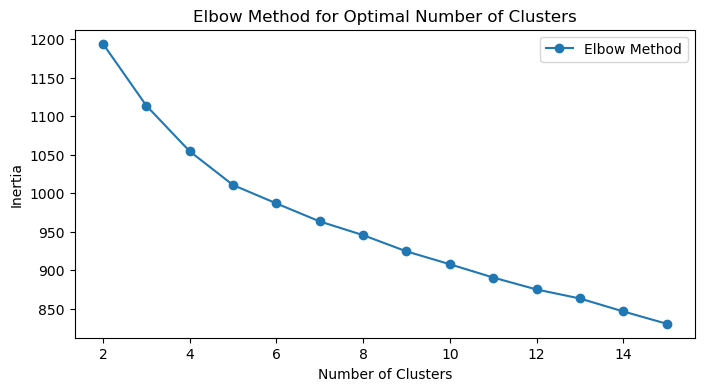

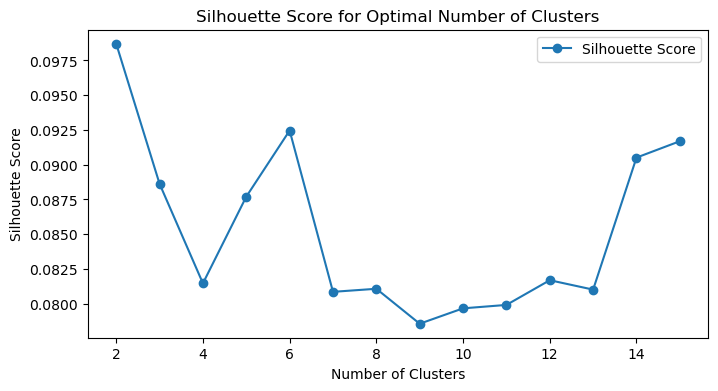

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

currdf = topicdf_dict['elect']
# Extract reduced embeddings from the combined dataframe
reduced_embeddings = np.array(currdf['reduced_embedding_30_elect'].tolist())

# Define the range of clusters to test
range_n_clusters = list(range(2, 16))

# Initialize lists to store the results
elbow_scores = []
silhouette_scores = []

# Loop over the range of clusters
for n_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the KMeans model
    kmeans.fit(reduced_embeddings)
    
    # Compute the inertia (sum of squared distances to the nearest cluster center)
    elbow_scores.append(kmeans.inertia_)
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(reduced_embeddings, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method results
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, elbow_scores, marker='o', label='Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.legend()
plt.show()

# Plot the Silhouette Score results
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.legend()
plt.show()

In [ ]:
# Perform KMeans clustering with 9 clusters
kmeans_9 = KMeans(n_clusters=9, random_state=42)
kmeans_9_labels = kmeans_9.fit_predict(np.array(currdf['reduced_embedding_30_elect'].tolist()))

# Save the labels to a new column 'kmean_9'
currdf['kmean_9'] = kmeans_9_labels

print("KMeans clustering with 9 clusters completed and labels saved to 'kmean_9' column.")

occurrence_matrix = pd.crosstab(currdf['label'], currdf['kmean_9'])
print(occurrence_matrix)

KMeans clustering with 9 clusters completed and labels saved to 'kmean_9' column.
kmean_9    0    1    2    3    4     5     6    7    8
label                                                 
0         67   69  229   65  228    51  1115   65  825
1        421  673  474  711  226  1066    71  832   74


/tmp/ipykernel_161048/660090091.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  currdf['kmean_9'] = kmeans_9_labels


In [ ]:
currdf.columns

Index(['text', 'label', 'prompt_name', 'source', 'RDizzl3_seven', 'model',
       'embedding', 'text_embedded', 'text_embedding_tc',
       'reduced_embedding_30_elect', 'tsne_p_elect30_1', 'tsne_p_elect30_2',
       'wc', 'kmean_9'],
      dtype='object')

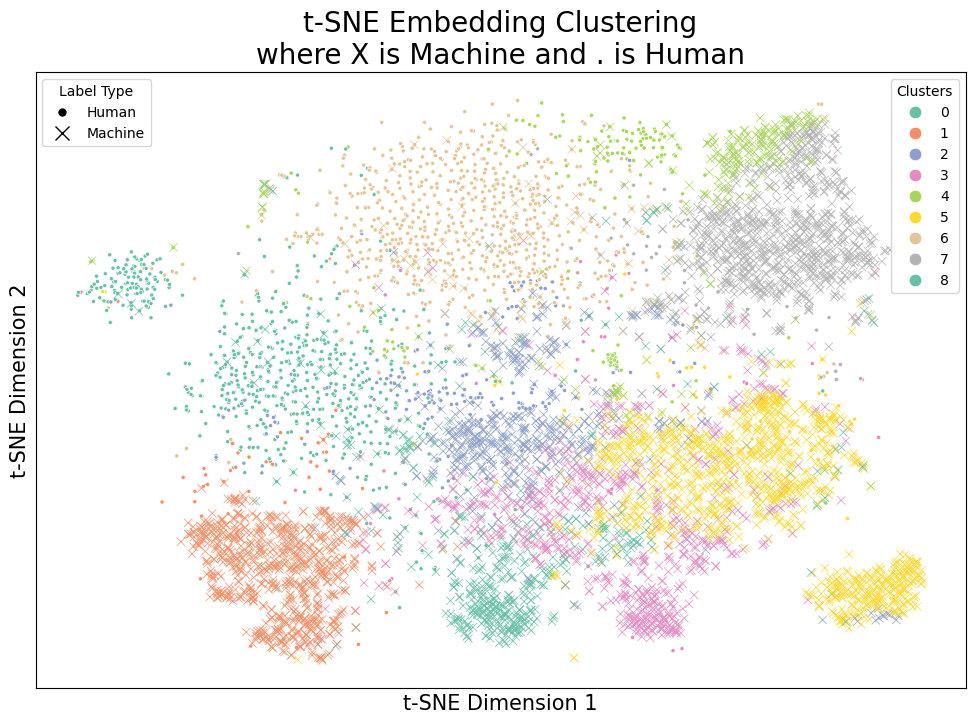

In [ ]:
import matplotlib.lines as mlines

# Create a new figure and single subplot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each label with specific markers using the same axes
for i, (label, marker) in enumerate({0: '.', 1: 'x'}.items()):
    sns.scatterplot(
        data=currdf[currdf['label'] == label],
        x='tsne_p_elect30_1',
        y='tsne_p_elect30_2',
        hue='kmean_9',
        marker=marker,
        palette='Set2',
        alpha=1,
        #edgecolor='w',
        ax=ax, 
        legend=False if i > 0 else "auto"
    )

# Set plot title and labels on the single axis
ax.set_title('t-SNE Embedding Clustering\nwhere X is Machine and . is Human', fontsize=20)
ax.set_xlabel('t-SNE Dimension 1', fontsize=15)
ax.set_ylabel('t-SNE Dimension 2', fontsize=15)
ax.set_xticks([])
ax.set_yticks([])

# Add a single legend for clusters
handles, labels = ax.get_legend_handles_labels()
#cluster_legend = ax.legend(handles[:len(set(currdf['kmean_9']))], title="Clusters", loc="upper right")
# Add a single legend for clusters by extracting only the cluster handles and labels
unique_handles = handles[:len(set(currdf['kmean_9']))]
unique_labels = labels[:len(set(currdf['kmean_9']))]
cluster_legend = ax.legend(handles=unique_handles, labels=unique_labels, title="Clusters", loc="upper right", markerscale = 3)


# Create custom legend entries for 'Machine' and 'Human' markers
human_marker = mlines.Line2D([], [], linestyle='None', color='black', marker='.', markerfacecolor='k', markersize=10, label='Human')
machine_marker = mlines.Line2D([], [], linestyle='None', color='black', marker='x', markerfacecolor='k', markersize=10, label='Machine')

# Add the custom legend for markers
ax.add_artist(cluster_legend)  # Keep the existing cluster legend
ax.legend(handles=[human_marker, machine_marker], title="Label Type", loc="upper left")

# Show the plot
plt.show()


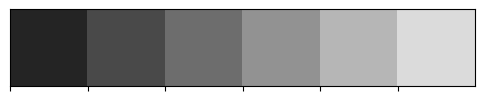

ValueError: Could not interpret value `kmean_9` for `hue`. An entry with this name does not appear in `data`.

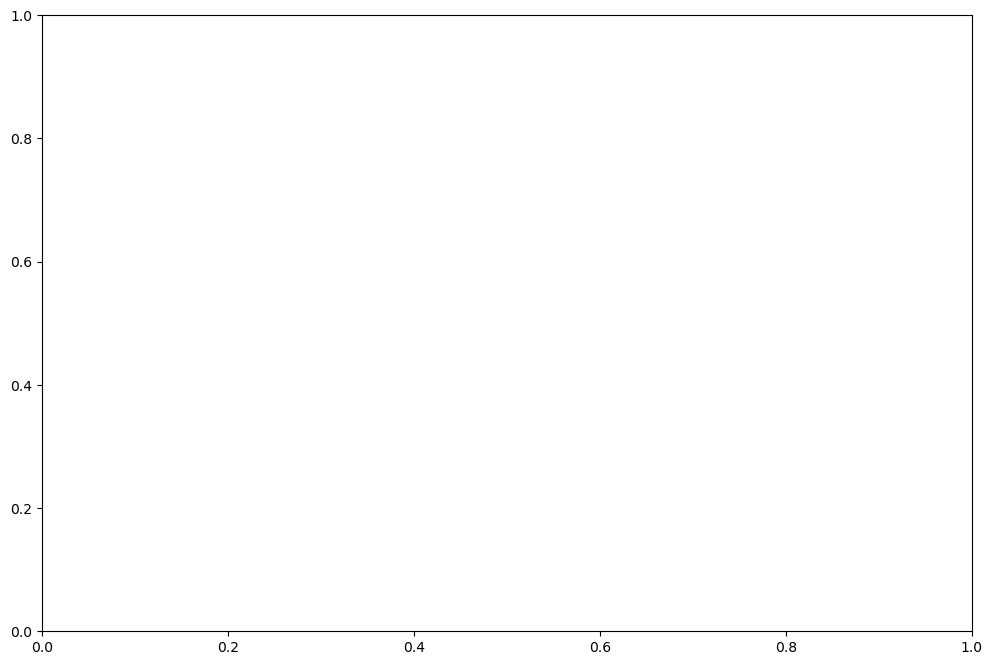

In [ ]:
import matplotlib.lines as mlines

# Create a new figure and single subplot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each label with specific markers using the same axes
for i, (label, marker) in enumerate({0: '.', 1: 'x'}.items()):
    sns.scatterplot(
        data=currdf[currdf['label'] == label],
        x='tsne_p_elect30_1',
        y='tsne_p_elect30_2',
        hue='kmean_9',
        marker=marker,
        palette='Set2',
        alpha=1,
        #edgecolor='w',
        ax=ax, 
        legend=False if i > 0 else "auto"
    )

# Set plot title and labels on the single axis
ax.set_title('t-SNE Embedding Clustering\nwhere X is Machine and . is Human', fontsize=20)
ax.set_xlabel('t-SNE Dimension 1', fontsize=15)
ax.set_ylabel('t-SNE Dimension 2', fontsize=15)
ax.set_xticks([])
ax.set_yticks([])

# Add a single legend for clusters
handles, labels = ax.get_legend_handles_labels()
#cluster_legend = ax.legend(handles[:len(set(currdf['kmean_9']))], title="Clusters", loc="upper right")
# Add a single legend for clusters by extracting only the cluster handles and labels
unique_handles = handles[:len(set(currdf['kmean_9']))]
unique_labels = labels[:len(set(currdf['kmean_9']))]
cluster_legend = ax.legend(handles=unique_handles, labels=unique_labels, title="Clusters", loc="upper right", markerscale = 3)


# Create custom legend entries for 'Machine' and 'Human' markers
human_marker = mlines.Line2D([], [], linestyle='None', color='black', marker='.', markerfacecolor='k', markersize=10, label='Human')
machine_marker = mlines.Line2D([], [], linestyle='None', color='black', marker='x', markerfacecolor='k', markersize=10, label='Machine')

# Add the custom legend for markers
ax.add_artist(cluster_legend)  # Keep the existing cluster legend
ax.legend(handles=[human_marker, machine_marker], title="Label Type", loc="upper left")

# Show the plot
plt.show()
